<a href="https://colab.research.google.com/github/c04chd03/Hello-World-/blob/master/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libararies 

In [4]:
import pandas as pd
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt

# Loading data 

In [6]:
data = pd.read_csv('/content/data.csv')

# Coverting dataframe to a numpy array 

In [7]:
data = np.array(data)

# Reading input and output array from data

In [8]:
X = data[:,:3]
Y = data[:,3]

# Initializing parameters

In [9]:
w = np.random.rand (3,)

In [10]:
# Maximum number of iterations.
max_iter = 500

# define an error vector to save all error values over all iterations.
error_all = []

# Learning rate for gradient descent.
eta = 0.5

# Training process in a for loop

In [11]:
for iter in range (0,max_iter):
    

    Y_hat = sps.expit(np.dot(X,w))
    
# =============================================================================
#     Compute the error below
# =============================================================================
    e = 0
    
    # Add this error to the end of error vector.
    e = -1/max_iter * np.sum( np.multiply(np.log(Y_hat), Y) + np.multiply(np.log(1-Y_hat), (1-Y)))

    #append error value in the error_all vector
    error_all.append(e)
    
    # Gradient of the error
    grad_e = np.mean(np.multiply((Y_hat - Y), X.T), axis=1)
    
    w_old = w
    w = w - eta*grad_e
    
    
    print ('epoch {0:d}, negative log-likelihood {1:.4f}, w={2}'.format(iter, e, w.T))

epoch 0, negative log-likelihood 0.8512, w=[-0.60319105  0.21320248  0.68824858]
epoch 1, negative log-likelihood 0.7320, w=[0.90072238 0.08011785 0.89818686]
epoch 2, negative log-likelihood 1.0919, w=[-0.33359692 -0.11178943  0.65156882]
epoch 3, negative log-likelihood 0.4153, w=[ 0.76878091 -0.21968851  0.7881303 ]
epoch 4, negative log-likelihood 0.8947, w=[-0.45559402 -0.40905663  0.54343807]
epoch 5, negative log-likelihood 0.5296, w=[ 0.90683132 -0.48838628  0.72422434]
epoch 6, negative log-likelihood 0.9773, w=[-0.32490084 -0.67623155  0.47767401]
epoch 7, negative log-likelihood 0.3957, w=[ 0.77758655 -0.71007546  0.61222052]
epoch 8, negative log-likelihood 0.7959, w=[-0.43388886 -0.89188669  0.36976961]
epoch 9, negative log-likelihood 0.5086, w=[ 0.86755134 -0.92810718  0.53836165]
epoch 10, negative log-likelihood 0.8373, w=[-0.34654153 -1.10833528  0.29525739]
epoch 11, negative log-likelihood 0.4293, w=[ 0.78311537 -1.11074147  0.43389272]
epoch 12, negative log-likeli

# Plot error over iterations

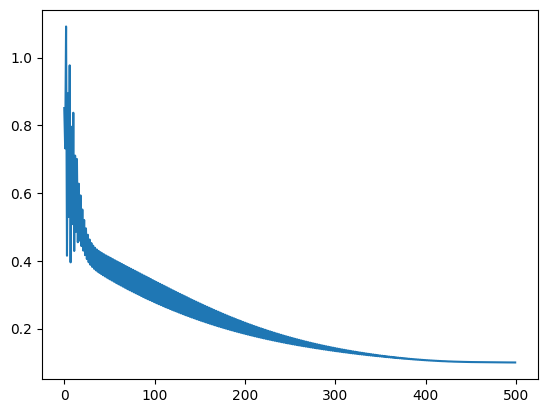

In [12]:
plt.plot(range(max_iter), error_all)


In [13]:
# New Learning rate for gradient descent.
newlearning_rates = [0.5, 0.3, 0.1, 0.05, 0.01]
error_all_rates = []

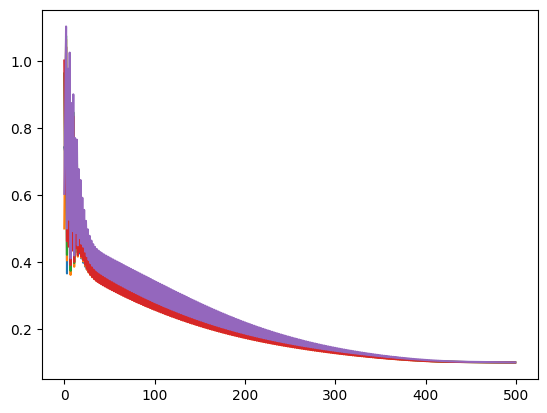

In [14]:
for restarting in newlearning_rates:
  # We start over the initial parameters
    w = np.random.rand(3,)  
    error_all = []  #Initialize error vector for each learning rate

    for iter2 in range(max_iter):
        Y_hat = sps.expit(np.dot(X, w))
        e2 = -1/max_iter * np.sum( np.multiply(np.log(Y_hat), Y) + np.multiply(np.log(1-Y_hat), (1-Y)))
        error_all.append(e2)

        grad_e = np.mean(np.multiply((Y_hat - Y), X.T), axis=1)

        w_old = w
        w = w - eta * grad_e

    error_all_rates.append(error_all)

# Plot error values for different learning rates
for i in range(len(newlearning_rates)):
    plt.plot(range(max_iter), error_all_rates[i])


In [15]:
#Scenario for the stochastic gradient descent
# New Learning rate for gradient descent.
newlearning_rates2 = [0.5, 0.3, 0.1, 0.05, 0.01]
error_all_rates2 = []

ValueError: ignored

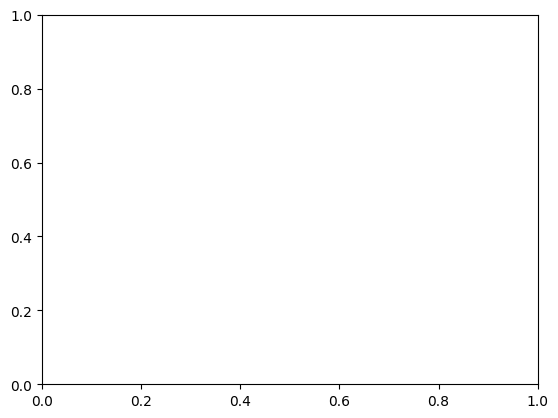

In [25]:
for restarting2 in newlearning_rates2:
    w = np.random.rand(3,)  # Re-initialize parameters for each learning rate
    error_all = []  # Initialize error vector for each learning rate

    for iter3 in range(max_iter):
        # Randomly shuffle the training data (source https://appdividend.com/2022/02/19/np-random-permutation/ & https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/)
        indexes = np.random.permutation(len(X))
        X_shuffled = X[indexes]
        Y_shuffled = Y[indexes]

        for i in range(len(X_shuffled)):
          x = X_shuffled[i]
          y = Y_shuffled[i]
          Y_hat = sps.expit(np.dot(x, w))
          # Compute the error as before
          e3 = -1/max_iter * np.sum( np.multiply(np.log(Y_hat), y) + np.multiply(np.log(1-Y_hat), (1-y)))
          error_all.append(e3)

          # Compute the gradient for the current example
          grad_e = (Y_hat - y) * X
          # Update the parameters w = w - restarting2 * grad_e
    error_all_rates2.append(error_all)

# Plot error values for stochastic gradient descent
for i in range(len(newlearning_rates2)):
    plt.plot(range(max_iter), error_all_rates2[i])
